# SOLAR RADIATION LEVEL - EDA AND PREDICTION

<img src="https://www.thebusinessguardians.com/wp-content/uploads/2021/04/New-Project-29-3.jpg">

## INTRODUCTION

Solar radiation is portion of the electromagnetic radiation given off by the sun. It is filtered through earth's atmosphere and scattered on Earth's surface. Solar radiation provides heat, light and energy for living organisms. Without solar radiation the earth's surface would be about 32 degree Celsius colder. Hence solar radiation is important and it provides necessary heat to living things.

## PURPOSE

Excess exposure to solar radiation would lead to increased risk of skin cancer, cataracts, accelerated skin aging and other eye diseases. So it is necessary to study the pattern of solar radiations and at what rate they are impacting humans? What are the factors that are most responsible for the increase in solar radiations?

## DATASET

Dataset has 11 features and the data is in CSV format
UNIXTime	Data	Time	Radiation	Temperature	Pressure	Humidity	WindDirection(Degrees)	Speed	TimeSunRise	TimeSunSet

The predictor here is **Solar Radiation Level**.
The dataset contains measurements for 4 months from **September 2016** to **December 2016**

1. **UNIXTime**:
    - It denotes seconds since Jan 1, 1970, useful in sorting this export's results with other export's results.
2. **Data**:
    - Date on which the reading was measured. It is in the format yyyy-mm-dd.
3. **Time**:
    - Time of the day when the reading was measured. It is in the format hh:mm:ss 24-hour.
4. **Radiation**:
    - Solar radiation level measured. The unit is watts per meter^2.
5. **Temperature**:
    - The value of the atmospheric temperature measured in degrees Fahrenheit.
6. **Pressure**:
    - It is the barometric pressure measured in Hg.
7. **Humidity**:
    - The value of humidity measured in percentage.
8. **WindDirection(Degrees)**:
    - The wind direction in degrees which was measured on the mentioned date and time.
9. **Speed**:
    - Speed of the wind in miles per hour.
10. **TimeSunRise**:
    - The sunrise time based on Hawaii time.
11. **TimeSunSet**:
    - The sunset time based on Hawaii time.
    

The data was obtained from __[Kaggle](https://www.kaggle.com/dronio/SolarEnergy/download)__


## Target
Here we are trying to predict solar radiation level based on the "wind direction", "wind speed", "humidity" and "temperature".

In [2]:
# !pip install geopandas
# !pip install wordcloud
# For graphs
# !pip install plotly
# For exporting graph as image
# !pip install kaleido

### Importing necessary modules

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import calendar
import datetime
import pytz
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

### Import dataset 

In [4]:
df_raw = pd.read_csv('./SolarRadiation.csv')
df = df_raw

In [5]:
# time is in reverse order, therefore order ascending
df = df.sort_values(by='UNIXTime', ascending=True).reset_index(drop=True)

**Let's have a quick look at the data**

In [6]:
df.shape

(32686, 11)

In [7]:
df.head(10)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1472724008,9/1/16 0:00,0:00:08,2.58,51,30.43,103,77.27,11.25,6:07:00,18:38:00
1,1472724310,9/1/16 0:00,0:05:10,2.83,51,30.43,103,153.44,9.00,6:07:00,18:38:00
2,1472725206,9/1/16 0:00,0:20:06,2.16,51,30.43,103,142.04,7.87,6:07:00,18:38:00
3,1472725505,9/1/16 0:00,0:25:05,2.21,51,30.43,103,144.12,18.00,6:07:00,18:38:00
4,1472725809,9/1/16 0:00,0:30:09,2.25,51,30.43,103,67.42,11.25,6:07:00,18:38:00
5,1472726704,9/1/16 0:00,0:45:04,2.15,51,30.43,103,67.85,4.50,6:07:00,18:38:00
6,1472727006,9/1/16 0:00,0:50:06,2.07,51,30.43,103,156.58,1.12,6:07:00,18:38:00
7,1472727304,9/1/16 0:00,0:55:04,2.06,52,30.43,103,69.98,7.87,6:07:00,18:38:00
8,1472727607,9/1/16 0:00,1:00:07,2.10,52,30.43,103,92.15,4.50,6:07:00,18:38:00
9,1472727905,9/1/16 0:00,1:05:05,2.07,52,30.42,103,68.17,4.50,6:07:00,18:38:00


In [8]:
df.tail(10)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
32676,1483261802,12/31/16 0:00,23:10:02,1.20,41,30.34,82,224.45,5.62,6:57:00,17:54:00
32677,1483262102,12/31/16 0:00,23:15:02,1.18,40,30.34,82,228.08,6.75,6:57:00,17:54:00
32678,1483262404,12/31/16 0:00,23:20:04,1.22,40,30.34,83,229.37,7.87,6:57:00,17:54:00
32679,1483262701,12/31/16 0:00,23:25:01,1.19,40,30.34,83,234.75,6.75,6:57:00,17:54:00
32680,1483263002,12/31/16 0:00,23:30:02,1.20,40,30.34,83,236.93,5.62,6:57:00,17:54:00
32681,1483263302,12/31/16 0:00,23:35:02,1.22,41,30.34,83,238.94,6.75,6:57:00,17:54:00
32682,1483263601,12/31/16 0:00,23:40:01,1.21,41,30.34,82,236.79,5.62,6:57:00,17:54:00
32683,1483263904,12/31/16 0:00,23:45:04,1.21,42,30.34,81,218.28,7.87,6:57:00,17:54:00
32684,1483264203,12/31/16 0:00,23:50:03,1.19,41,30.34,80,215.23,7.87,6:57:00,17:54:00
32685,1483264501,12/31/16 0:00,23:55:01,1.21,41,30.34,81,215.56,9.00,6:57:00,17:54:00


In [9]:
df.count()

UNIXTime                  32686
Data                      32686
Time                      32686
Radiation                 32686
Temperature               32686
Pressure                  32686
Humidity                  32686
WindDirection(Degrees)    32686
Speed                     32686
TimeSunRise               32686
TimeSunSet                32686
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [11]:
df.isnull().value_counts()

UNIXTime  Data   Time   Radiation  Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed  TimeSunRise  TimeSunSet
False     False  False  False      False        False     False     False                   False  False        False         32686
dtype: int64

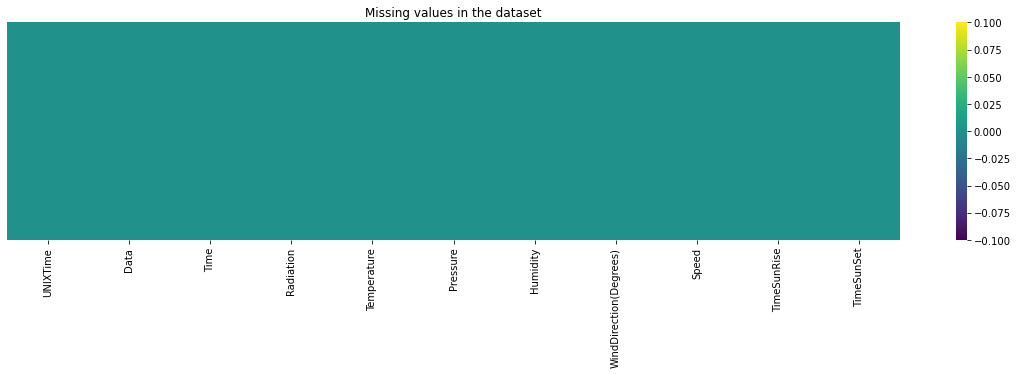

In [12]:
plt.figure(figsize=(20,4))
sns.heatmap(df.isnull(),cbar=True,cmap='viridis',yticklabels=False)
plt.title('Missing values in the dataset');

**As we can see that the count is same for all of the columns which is 3286. So there is no missing data**

**Let's convert integer column values to float values**

In [13]:
df.dtypes

UNIXTime                    int64
Data                       object
Time                       object
Radiation                 float64
Temperature                 int64
Pressure                  float64
Humidity                    int64
WindDirection(Degrees)    float64
Speed                     float64
TimeSunRise                object
TimeSunSet                 object
dtype: object

In [14]:
df = df.astype({'Temperature': 'float64', 'Humidity': 'float64'})

In [15]:
df.dtypes

UNIXTime                    int64
Data                       object
Time                       object
Radiation                 float64
Temperature               float64
Pressure                  float64
Humidity                  float64
WindDirection(Degrees)    float64
Speed                     float64
TimeSunRise                object
TimeSunSet                 object
dtype: object

In [16]:
df.head(10)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1472724008,9/1/16 0:00,0:00:08,2.58,51.0,30.43,103.0,77.27,11.25,6:07:00,18:38:00
1,1472724310,9/1/16 0:00,0:05:10,2.83,51.0,30.43,103.0,153.44,9.00,6:07:00,18:38:00
2,1472725206,9/1/16 0:00,0:20:06,2.16,51.0,30.43,103.0,142.04,7.87,6:07:00,18:38:00
3,1472725505,9/1/16 0:00,0:25:05,2.21,51.0,30.43,103.0,144.12,18.00,6:07:00,18:38:00
4,1472725809,9/1/16 0:00,0:30:09,2.25,51.0,30.43,103.0,67.42,11.25,6:07:00,18:38:00
5,1472726704,9/1/16 0:00,0:45:04,2.15,51.0,30.43,103.0,67.85,4.50,6:07:00,18:38:00
6,1472727006,9/1/16 0:00,0:50:06,2.07,51.0,30.43,103.0,156.58,1.12,6:07:00,18:38:00
7,1472727304,9/1/16 0:00,0:55:04,2.06,52.0,30.43,103.0,69.98,7.87,6:07:00,18:38:00
8,1472727607,9/1/16 0:00,1:00:07,2.10,52.0,30.43,103.0,92.15,4.50,6:07:00,18:38:00
9,1472727905,9/1/16 0:00,1:05:05,2.07,52.0,30.42,103.0,68.17,4.50,6:07:00,18:38:00


**Let's have look at the mean, count, minimum and maximum values about the data**

In [17]:
df.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


**As we can see in above, there is quite a difference between mean(207.124697) and  median(2.66) of our target variable.**

**This indicates that there are outliers in our dataset and need to be taken care of.**

**Let's visualize the outliers using Box Plot**

<AxesSubplot:>

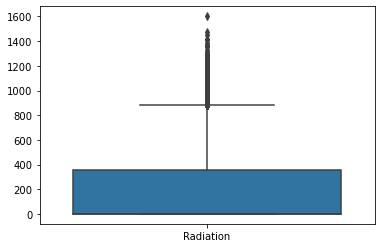

In [18]:
df_box = pd.DataFrame(df_raw, columns=['Radiation'])
sns.boxplot(data=df_box)

**Let's remove these outliers using IQR (Inter Quartile Range).**

In [19]:
Q1 = df.Radiation.quantile(0.25)
Q1

1.23

In [20]:
Q3 = df.Radiation.quantile(0.75)
Q3

354.235

In [21]:
IQR = Q3 - Q1
IQR

353.005

In [22]:
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

lower_limit, upper_limit

(-528.2774999999999, 883.7425)

In [23]:
df[(df.Radiation < lower_limit) | (df.Radiation > upper_limit)]

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
101,1472759707,9/1/16 0:00,9:55:07,899.06,57.0,30.47,76.0,109.50,7.87,6:07:00,18:38:00
102,1472760007,9/1/16 0:00,10:00:07,928.27,57.0,30.47,77.0,37.85,4.50,6:07:00,18:38:00
103,1472760309,9/1/16 0:00,10:05:09,999.94,57.0,30.47,76.0,80.80,9.00,6:07:00,18:38:00
104,1472760606,9/1/16 0:00,10:10:06,916.47,57.0,30.47,76.0,71.14,4.50,6:07:00,18:38:00
105,1472760905,9/1/16 0:00,10:15:05,986.69,58.0,30.47,73.0,140.16,13.50,6:07:00,18:38:00
...,...,...,...,...,...,...,...,...,...,...,...
31689,1482964557,12/28/16 0:00,12:35:57,1045.66,52.0,30.38,89.0,55.33,9.00,6:56:00,17:52:00
31695,1482966350,12/28/16 0:00,13:05:50,1157.27,52.0,30.37,93.0,359.81,4.50,6:56:00,17:52:00
31698,1482967240,12/28/16 0:00,13:20:40,1079.18,51.0,30.36,92.0,95.29,7.87,6:56:00,17:52:00
32537,1483220102,12/31/16 0:00,11:35:02,1026.34,52.0,30.33,68.0,308.04,11.25,6:57:00,17:54:00


In [24]:
df_no_outlier = df[(df.Radiation > lower_limit) & (df.Radiation < upper_limit)]
df_no_outlier 
df = df_no_outlier

<AxesSubplot:>

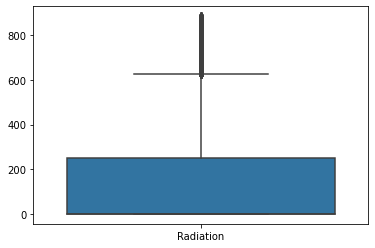

In [25]:
df_no_outlier_box = pd.DataFrame(df_no_outlier, columns=['Radiation'])
sns.boxplot(data=df_no_outlier_box)

### Visualizing and Examining the Dataset

**Let's see what is the relation between the features**

<AxesSubplot:>

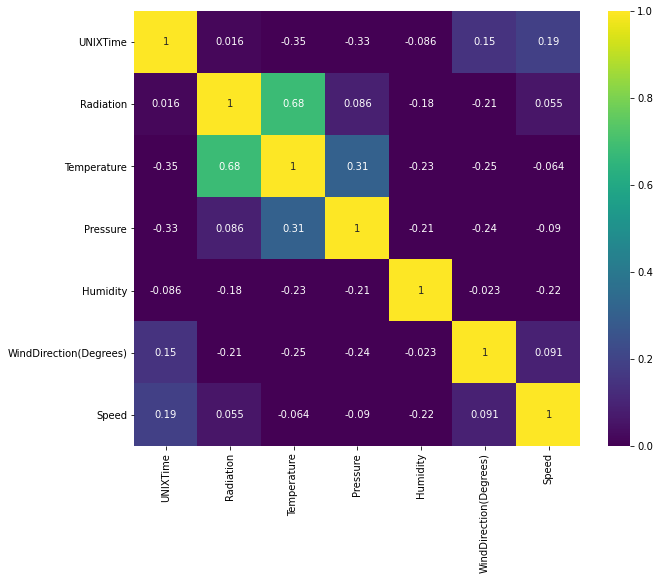

In [26]:
# Correlation Plot
plt.rcParams['figure.figsize'] = 10, 8
sns.heatmap(df.corr(), vmin=0, vmax=1, annot=True, cmap="viridis")

**As can be seen from above correlation plot that there is positive relation between Temperature and Radiation**

array([[<AxesSubplot:title={'center':'UNIXTime'}>,
        <AxesSubplot:title={'center':'Radiation'}>,
        <AxesSubplot:title={'center':'Temperature'}>],
       [<AxesSubplot:title={'center':'Pressure'}>,
        <AxesSubplot:title={'center':'Humidity'}>,
        <AxesSubplot:title={'center':'WindDirection(Degrees)'}>],
       [<AxesSubplot:title={'center':'Speed'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

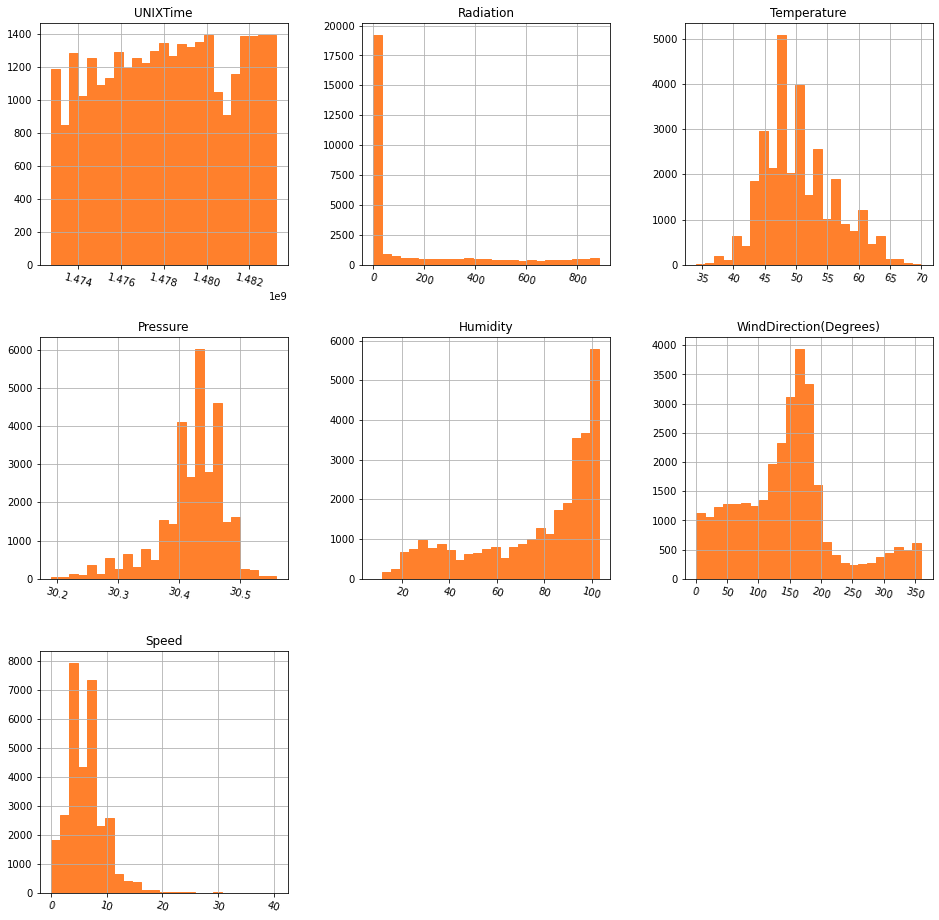

In [27]:
df.hist(figsize=(16,16), xrot=-15, bins=25, color="#FF802C", ec='#FF802C')

In [28]:
df

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1472724008,9/1/16 0:00,0:00:08,2.58,51.0,30.43,103.0,77.27,11.25,6:07:00,18:38:00
1,1472724310,9/1/16 0:00,0:05:10,2.83,51.0,30.43,103.0,153.44,9.00,6:07:00,18:38:00
2,1472725206,9/1/16 0:00,0:20:06,2.16,51.0,30.43,103.0,142.04,7.87,6:07:00,18:38:00
3,1472725505,9/1/16 0:00,0:25:05,2.21,51.0,30.43,103.0,144.12,18.00,6:07:00,18:38:00
4,1472725809,9/1/16 0:00,0:30:09,2.25,51.0,30.43,103.0,67.42,11.25,6:07:00,18:38:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1483263302,12/31/16 0:00,23:35:02,1.22,41.0,30.34,83.0,238.94,6.75,6:57:00,17:54:00
32682,1483263601,12/31/16 0:00,23:40:01,1.21,41.0,30.34,82.0,236.79,5.62,6:57:00,17:54:00
32683,1483263904,12/31/16 0:00,23:45:04,1.21,42.0,30.34,81.0,218.28,7.87,6:57:00,17:54:00
32684,1483264203,12/31/16 0:00,23:50:03,1.19,41.0,30.34,80.0,215.23,7.87,6:57:00,17:54:00


**Histogram above shows us how often each different value in a dataset occurs which is the frequency distribution**

We can see that data in Radiation is left-skewed and Humidity data is right-skewed.

To remove the skewness we will apply Box-Cox transform which reduces skewness to least.

In [29]:
# Skewness before
print('Radiation skewness:', df['Radiation'].skew())
print('Humidity skewness:', df['Humidity'].skew())

Radiation skewness: 1.515031933365721
Humidity skewness: -0.8495101030920267


array([[<AxesSubplot:title={'center':'UNIXTime'}>,
        <AxesSubplot:title={'center':'Radiation'}>,
        <AxesSubplot:title={'center':'Temperature'}>],
       [<AxesSubplot:title={'center':'Pressure'}>,
        <AxesSubplot:title={'center':'Humidity'}>,
        <AxesSubplot:title={'center':'WindDirection(Degrees)'}>],
       [<AxesSubplot:title={'center':'Speed'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

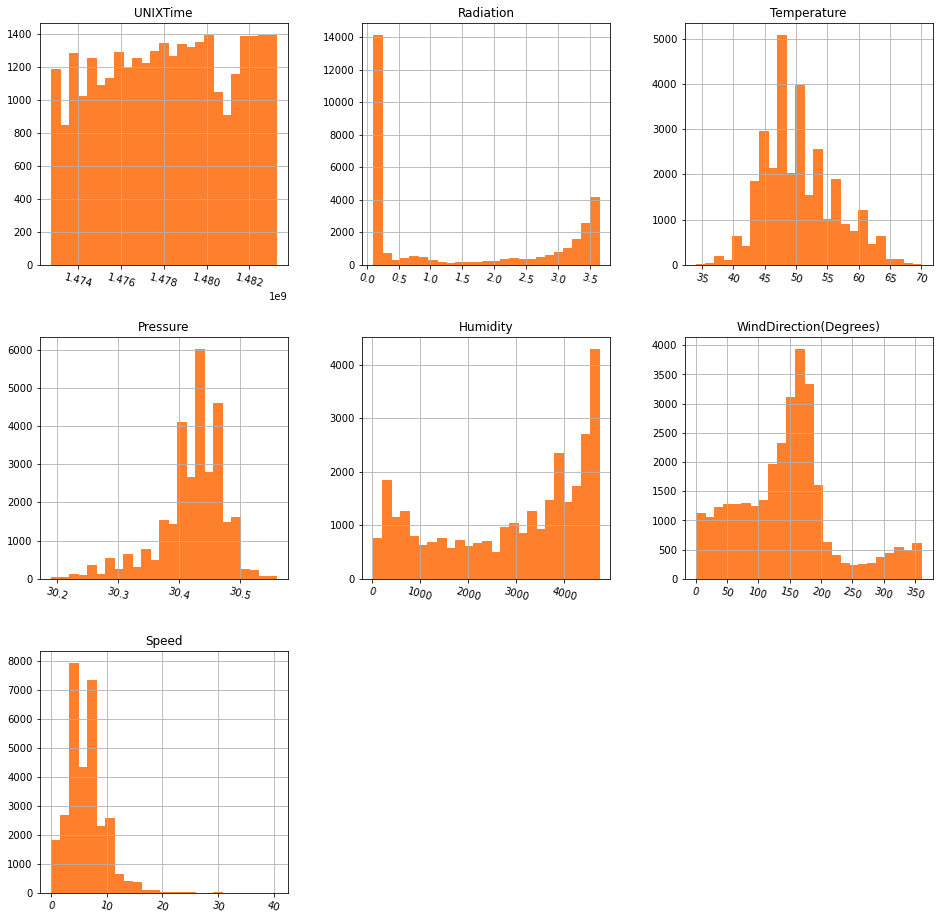

In [30]:
humidity_boxcox = stats.boxcox(df['Humidity'])[0]
radiation_boxcox = stats.boxcox(df['Radiation'])[0]
df_copy = df.copy()
df_copy['Humidity'] = humidity_boxcox
df_copy['Radiation'] = radiation_boxcox
df = df_copy.copy()
df_copy.hist(figsize=(16,16), xrot=-15, bins=25, color="#FF802C", ec='#FF802C')

In [31]:
# Skewness after applying boxcox
print('Radiation skewness:', df['Radiation'].skew())
print('Humidity skewness:', df['Humidity'].skew())

Radiation skewness: 0.34270610611595365
Humidity skewness: -0.5010428421520257


As we can see that the skewness of Humidity and Radiation is reduced and we have handled the skewness.

**Now convert time to date_time for easy intrepretation and visualization**

In [32]:
df['conv_time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
#set Hawaii timezone
Hawaii_tz = pytz.timezone(zone='US/Hawaii')
datetimeHI = df['UNIXTime'].apply(lambda x: datetime.datetime.utcfromtimestamp(x).replace(tzinfo=pytz.utc).astimezone(Hawaii_tz))
df['HawaiiDateTime'] = datetimeHI

# Store Hour
df['hour'] = pd.to_datetime(df['conv_time'], format='%H:%M:%S').dt.hour

# Store Minute
df['minute'] = pd.to_datetime(df['conv_time'], format='%H:%M:%S').dt.minute

# Store Seconds
df['seconds'] = pd.to_datetime(df['conv_time'], format='%H:%M:%S').dt.second

# Store Year
df['year'] = pd.to_datetime(df['UNIXTime'].astype(int), unit='s').dt.year

# Store Month
df['month'] = pd.to_datetime(df['UNIXTime'].astype(int), unit='s').dt.month
df['month_name'] = pd.to_datetime(df['UNIXTime'].astype(int), unit='s').dt.month.apply(lambda x: calendar.month_abbr[x])


#Total length of the day
df['day_length'] = pd.to_datetime(df['TimeSunSet'], format='%H:%M:%S').dt.hour - \
pd.to_datetime(df['TimeSunRise'],format=('%H:%M:%S')).dt.hour

**Let's see how Radation, Humidity is spread by hour, month**

In [33]:
df

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,conv_time,HawaiiDateTime,hour,minute,seconds,year,month,month_name,day_length
0,1472724008,9/1/16 0:00,0:00:08,0.860545,51.0,30.43,4713.681588,77.27,11.25,6:07:00,18:38:00,1900-01-01 00:00:08,2016-09-01 00:00:08-10:00,0,0,8,2016,9,Sep,12
1,1472724310,9/1/16 0:00,0:05:10,0.935821,51.0,30.43,4713.681588,153.44,9.00,6:07:00,18:38:00,1900-01-01 00:05:10,2016-09-01 00:05:10-10:00,0,5,10,2016,9,Sep,12
2,1472725206,9/1/16 0:00,0:20:06,0.711819,51.0,30.43,4713.681588,142.04,7.87,6:07:00,18:38:00,1900-01-01 00:20:06,2016-09-01 00:20:06-10:00,0,20,6,2016,9,Sep,12
3,1472725505,9/1/16 0:00,0:25:05,0.731283,51.0,30.43,4713.681588,144.12,18.00,6:07:00,18:38:00,1900-01-01 00:25:05,2016-09-01 00:25:05-10:00,0,25,5,2016,9,Sep,12
4,1472725809,9/1/16 0:00,0:30:09,0.746475,51.0,30.43,4713.681588,67.42,11.25,6:07:00,18:38:00,1900-01-01 00:30:09,2016-09-01 00:30:09-10:00,0,30,9,2016,9,Sep,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32681,1483263302,12/31/16 0:00,23:35:02,0.194811,41.0,30.34,3079.603478,238.94,6.75,6:57:00,17:54:00,1900-01-01 23:35:02,2016-12-31 23:35:02-10:00,23,35,2,2017,1,Jan,11
32682,1483263601,12/31/16 0:00,23:40:01,0.186906,41.0,30.34,3006.871926,236.79,5.62,6:57:00,17:54:00,1900-01-01 23:40:01,2016-12-31 23:40:01-10:00,23,40,1,2017,1,Jan,11
32683,1483263904,12/31/16 0:00,23:45:04,0.186906,42.0,30.34,2934.996940,218.28,7.87,6:57:00,17:54:00,1900-01-01 23:45:04,2016-12-31 23:45:04-10:00,23,45,4,2017,1,Jan,11
32684,1483264203,12/31/16 0:00,23:50:03,0.170856,41.0,30.34,2863.978821,215.23,7.87,6:57:00,17:54:00,1900-01-01 23:50:03,2016-12-31 23:50:03-10:00,23,50,3,2017,1,Jan,11


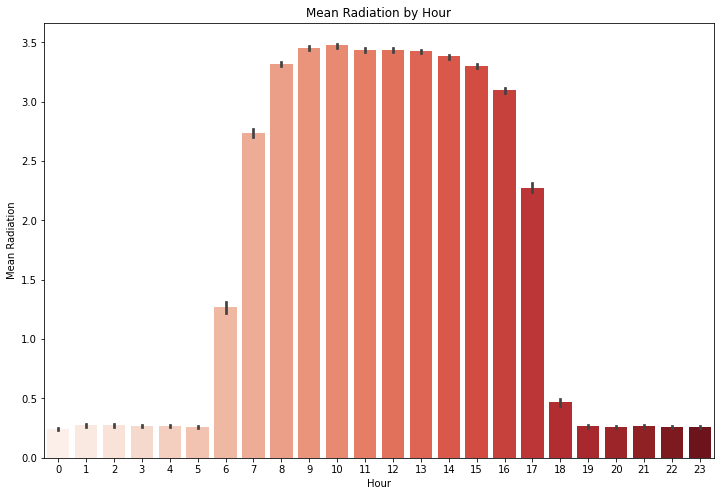

In [34]:
# Radiation by Hour
plt.rcParams['figure.figsize'] = 12, 8
ax = sns.barplot(data=df, x='hour', y='Radiation', palette = 'Reds')
ax.set(title='Mean Radiation by Hour', ylabel='Mean Radiation', xlabel='Hour')
plt.show()

**From above graph we can see that the radiation level goes on increasing as the day starts and is highest during afternoon and it goes down as sun sets**

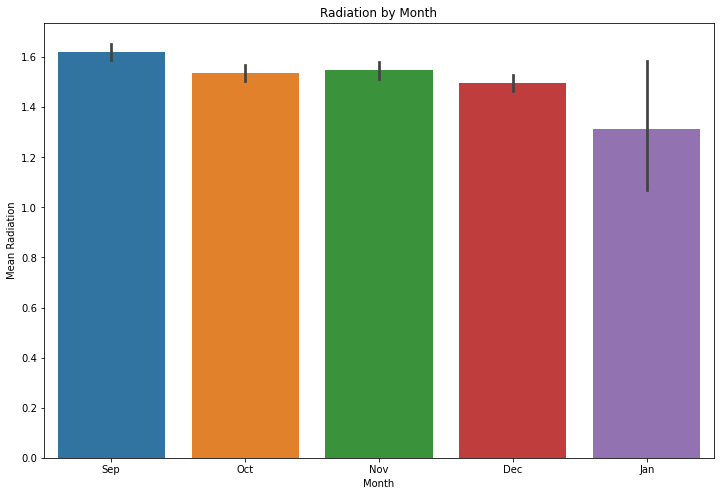

In [35]:
# Raditaion by Month
plt.rcParams['figure.figsize'] = 12, 8
ax = sns.barplot(data=df, x='month_name', y='Radiation')
ax.set(title='Radiation by Month', ylabel='Mean Radiation', xlabel='Month')
plt.show()

**We can see from above plot that the radiation level is high during summer and goes on decreasing as we proceed to fall**

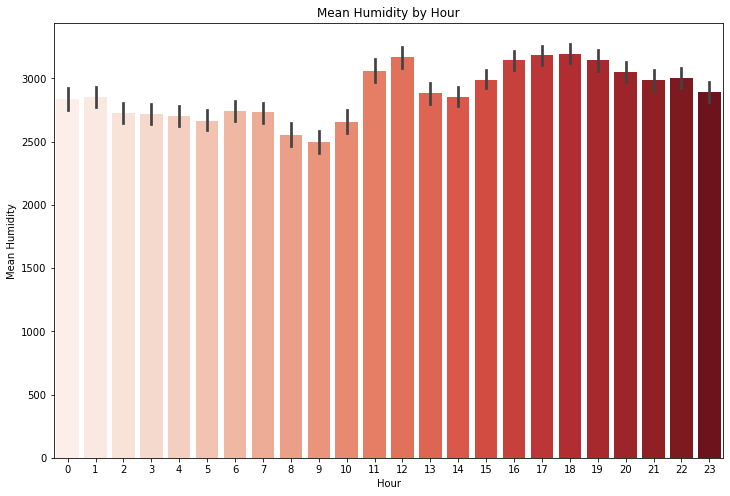

In [36]:
# Humidity by Hour
plt.rcParams['figure.figsize'] = 12, 8
ax = sns.barplot(data=df, x='hour', y='Humidity', palette = 'Reds')
ax.set(title='Mean Humidity by Hour', ylabel='Mean Humidity', xlabel='Hour')
plt.show()

**From above bar plot we can say that humidity is fluctuating during the day and there is no proper pattern**

**Analyzing data further over a week period of time (09-01-2016 --- 09-08-2016)**

In [37]:
import pytz
HItz = pytz.timezone(zone='US/Hawaii')
DatetimeHI = df['UNIXTime'].apply(lambda x: 
                                 datetime.datetime.utcfromtimestamp(x).replace(tzinfo=pytz.utc).astimezone(HItz))
temp_data = df.copy()
temp_data['DatetimeHI'] = DatetimeHI

In [38]:
# extract one week of data
weekendmarker = datetime.datetime(2016,9, 8).replace(tzinfo=HItz)
weekonedata = df[df['HawaiiDateTime'] < weekendmarker]


In [39]:
def abstract_week_plot(ax, dates, col, colname):
    # This functions takes in column of data and 
    # spits out axis with one week of data which then can be added to another plot
    
    # Colorize predictor vs other features
    if colname == 'Radiation':
        plt_color = 'red'
    else:
        plt_color = 'green'
    
    # plot the data
    ax.plot(dates, col, c=plt_color)
    
    # format
    ax.set_title('{colname} 9/1/2016 - 9/8/2016'.format(colname=colname))
    ax.set_ylabel('{colname} Level'.format(colname=colname))
    ax.set_xlabel('Date')
    
    # rotation
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    
    return ax

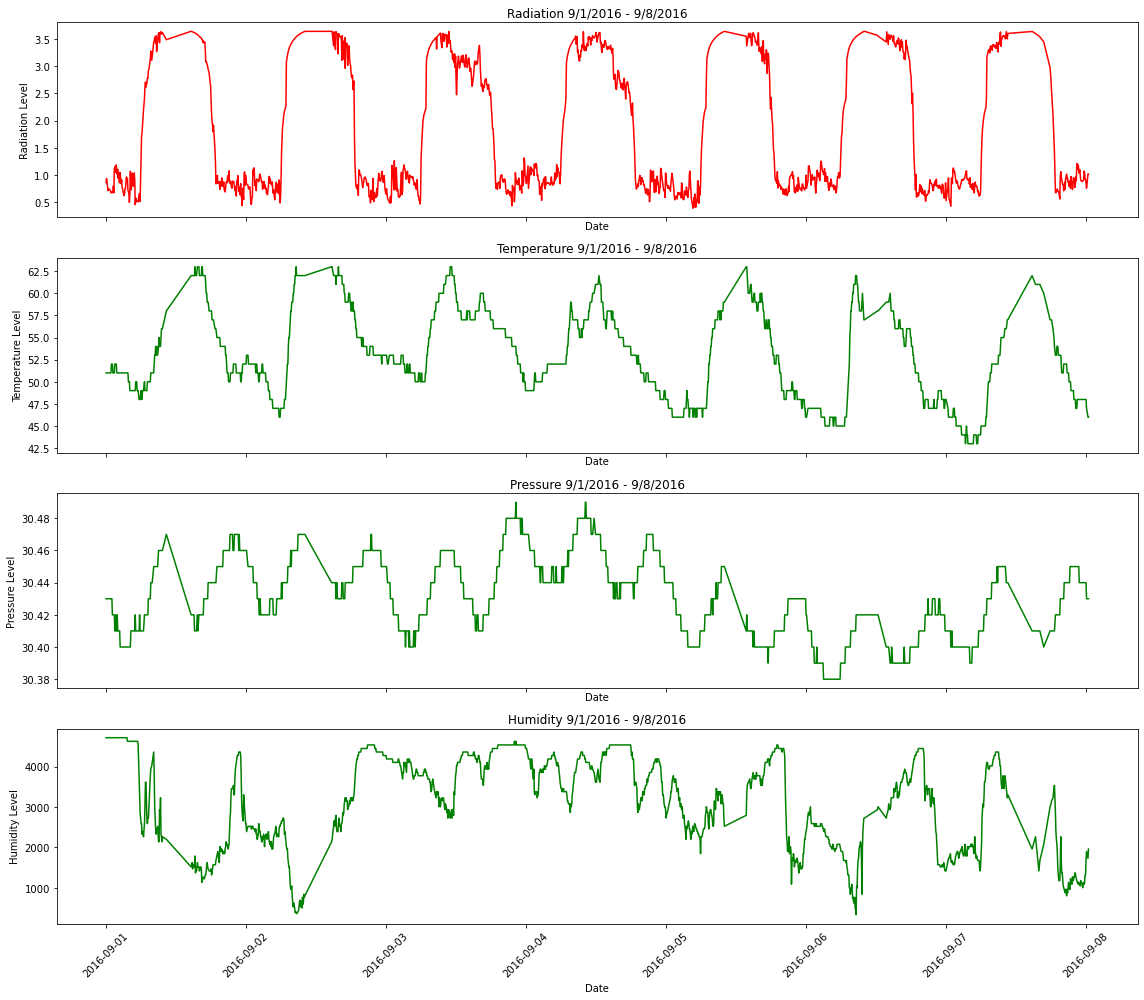

In [40]:
# make plot larger
plt.rcParams['figure.figsize'] = 16, 14

# loop over all columns important in data
ts_cols = ['Radiation', 'Temperature', 'Pressure', 'Humidity']
fig, axes = plt.subplots(len(ts_cols), sharex=True)
for i, ax in enumerate(axes):
    ax = abstract_week_plot(ax, weekonedata['HawaiiDateTime'], weekonedata[ts_cols[i]], ts_cols[i])

# prevent squashing
fig.tight_layout()


**From above graph we can infer below important points:**

    - Temperature and Radiation have a very close connection. Oscillations appear to be quite in step.
    - Pressure is also cyclic but has a different period than radiation.
    - Humidity appear to be noisy.

### Linear Regression Model

**Import Libraries**

In [41]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression

**Train Test Split**

Test data is 20% while rest data we are using here is to train the model

In [42]:
X = df[['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', "Speed"]]
y = df[['Radiation']]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
X_train

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
31353,52.0,30.46,266.314887,152.69,14.62
10526,50.0,30.46,3379.089481,184.15,3.37
16856,44.0,30.42,625.867285,166.90,9.00
9150,46.0,30.40,3006.871926,178.25,7.87
26814,54.0,30.37,4534.922800,305.89,11.25
...,...,...,...,...,...
52,49.0,30.41,4623.876571,94.79,1.12
10750,55.0,30.47,499.386301,115.20,4.50
1928,55.0,30.39,3772.685202,22.23,3.37
10823,49.0,30.47,1003.320606,167.59,9.00


**Model Building**

In [45]:
X_test

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
9894,54.0,30.41,3302.934590,130.15,1.12
9662,50.0,30.43,3612.683760,190.78,6.75
26331,49.0,30.44,4359.569949,235.82,0.00
6304,48.0,30.45,1178.701909,173.47,5.62
17082,48.0,30.47,625.867285,173.61,2.25
...,...,...,...,...,...
30572,57.0,30.41,2078.711845,100.08,2.25
12548,48.0,30.42,2455.881621,165.51,4.50
27735,47.0,30.27,1319.356457,237.81,7.87
29309,44.0,30.52,2390.870312,177.85,7.87


In [46]:
y_train

,Radiation
31353,3.432618
10526,0.218065
16856,0.202638
9150,0.218065
26814,3.274934
...,...
52,0.888622
10750,0.225666
1928,3.301835
10823,0.162709


In [47]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

### Predicting the Solar Radiation level

In [48]:
preds = lm.predict(X_test)
preds

array([[ 2.20958802],
       [ 1.43365195],
       [ 1.04047121],
       ...,
       [ 1.53378867],
       [-0.24850937],
       [ 2.97449799]])

In [49]:
print('MSE: ', metrics.mean_squared_error(y_test, preds))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('Score: ', lm.score(X,y))

MSE:  1.0722665554307014
RMSE:  1.035503044626476
Score:  0.48906849338347924


**Let's see actual and predicted values plot**

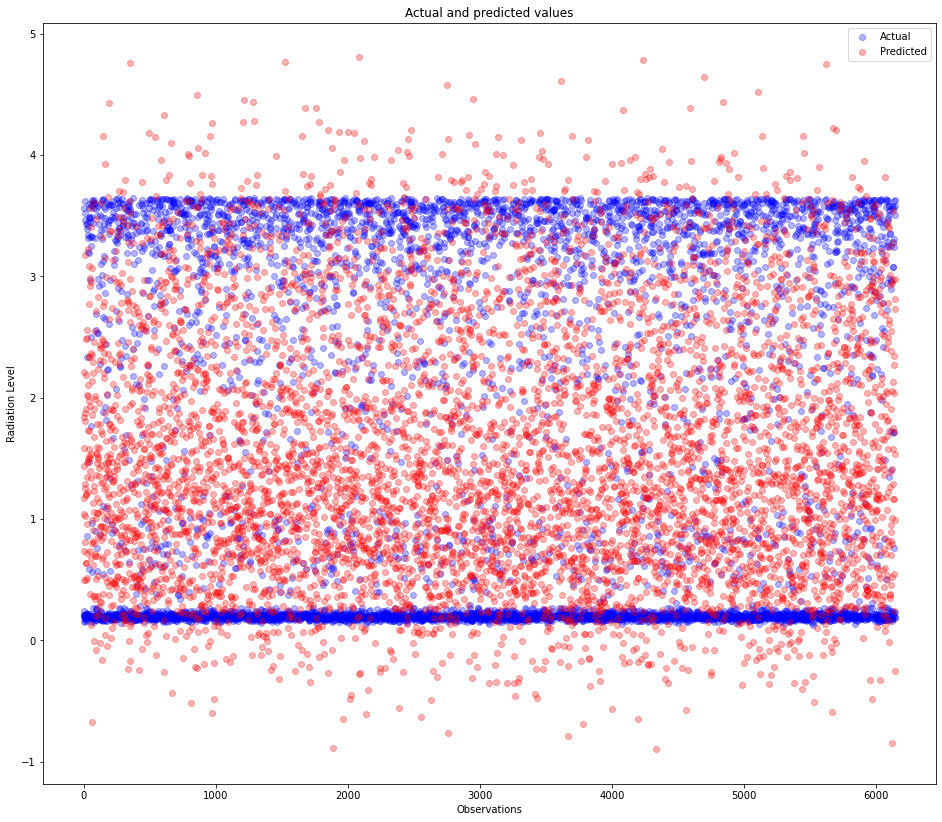

In [50]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, preds.size), y=preds, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('Radiation Level')
plt.legend()
plt.show()

#### Use K Fold cross validation to measure accuracy of our LinearRegression model

In [51]:
# Creating a ShuffleSplit for my cross validation
# ShuffleSplit will randomize our sample so that each of the fold have equal distribution of my data samples
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
print('Scores for K-Fold:', cross_val_score(LinearRegression(), X, y, cv = cv))
print('Average score from K-Fold:', np.average(cross_val_score(LinearRegression(), X, y, cv = cv)))

Scores for K-Fold: [0.4757963  0.4875178  0.49732032 0.49348112 0.47377503]
Average score from K-Fold: 0.4855781144045507


**We can see that in 5 iterations we get a score which is between 47%-49% for majority of the time. We want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose**

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor


model_params = {    
                    
                    #linearRegression
                    'linear_regression': {
                         'model': LinearRegression(),
                         'params': {
                             
                                    'normalize': [True, False]
                            }
                    },
    
                        
                    #decision_tree
                    'decision_tree' : {
                        'model': DecisionTreeRegressor(),
                        'params': {
                            'max_depth':[1,5,10,20,50,100,200],
                            'criterion':['mse','friedman_mse'],
                            'splitter': ['best','random']
                        }
                    },
    
    
                    #Lasso
                    'lasso': {
                        'model': Lasso(),
                        'params': {
                                    #'max_iter': [1,5,10,20,50],
                                    'alpha': [0.02, 0.024, 0.025, 0.026, 0.03, 0.05, 0.5, 1,2],
                                    'selection': ['random', 'cyclic'],
                                    'normalize':[True, False]
                            }
                    },
                    
                        
                    #Ridge
                    'ridge': {
                        'model': Ridge(),
                        'params': {
                                    #'max_iter': [1, 5, 10,20,50],
                                    'alpha': [0.05, 0.1, 0.5, 1, 5, 10, 200, 230, 250,265, 270, 275, 290, 300,500],
                                    'normalize':[True, False]
                        }
                    },
    
                    
                            
                }

In [54]:

scores=[]

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
for model_name, mp in model_params.items():
    GS_CV = GridSearchCV(mp['model'], mp['params'], cv = cv, return_train_score = False)
    GS_CV.fit(X,y)
    scores.append({
        'Model': model_name,
        'Best Score': GS_CV.best_score_
    })

    

df_GS_CV = pd.DataFrame(scores)
df_GS_CV

,Model,Best Score
0,linear_regression,0.489015
1,decision_tree,0.615653
2,lasso,0.450874
3,ridge,0.489015


**Based on above results we can say that Decision Tree Regressor gives the best score.**

### Feature Importance using SHAPely values

In [55]:
import shap
shap.initjs()

In [56]:
kf = KFold(n_splits=10)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [57]:
shap.sample(X_train, 10)

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
16459,49.0,30.46,766.368773,162.55,10.12
9102,50.0,30.44,4534.922800,160.77,6.75
2262,51.0,30.41,4187.624982,108.00,1.12
5055,59.0,30.39,2724.514404,0.23,3.37
25120,45.0,30.32,3853.966691,128.14,3.37
10549,48.0,30.44,2200.994237,190.73,6.75
16031,49.0,30.48,4446.820511,156.46,6.75
22881,43.0,30.44,1732.544359,96.58,5.62
25919,45.0,30.40,3853.966691,329.18,0.00
4001,54.0,30.47,2793.817873,146.69,7.87


In [58]:
X_train

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
31353,52.0,30.46,266.314887,152.69,14.62
10526,50.0,30.46,3379.089481,184.15,3.37
16856,44.0,30.42,625.867285,166.90,9.00
9150,46.0,30.40,3006.871926,178.25,7.87
26814,54.0,30.37,4534.922800,305.89,11.25
...,...,...,...,...,...
52,49.0,30.41,4623.876571,94.79,1.12
10750,55.0,30.47,499.386301,115.20,4.50
1928,55.0,30.39,3772.685202,22.23,3.37
10823,49.0,30.47,1003.320606,167.59,9.00


In [59]:
df_raw[2:3]

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
2,1475228726,9/29/16 0:00,23:45:26,1.23,48,30.46,57,158.75,3.37,6:13:00,18:13:00


In [63]:
import warnings
warnings.filterwarnings('ignore')

Using 24576 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 1/1 [00:01<00:00,  1.92s/it]


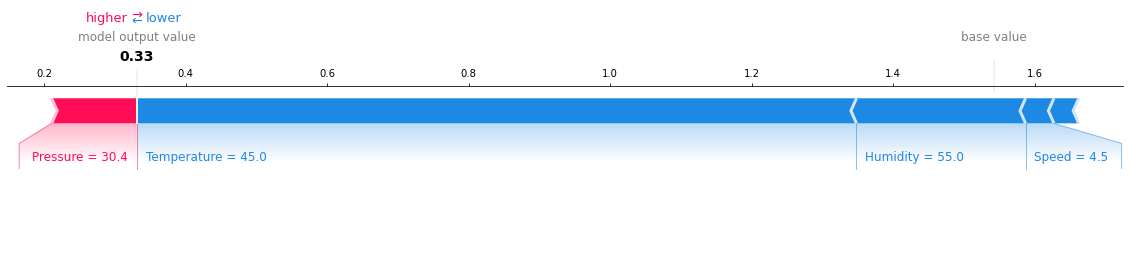

100%|██████████| 1/1 [00:01<00:00,  1.88s/it]


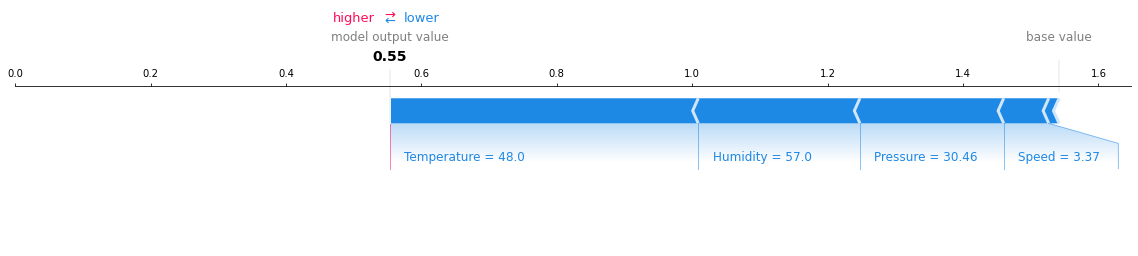

100%|██████████| 1/1 [00:01<00:00,  1.86s/it]


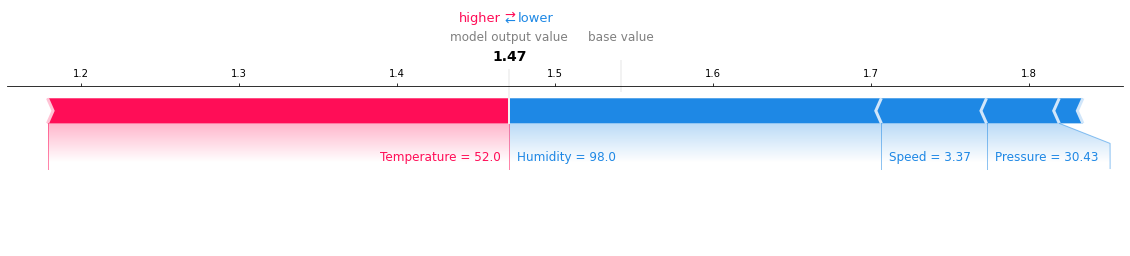

In [71]:
lm_explnr = shap.KernelExplainer(lm.predict, X_train)

sel_instance = df_raw[222:223]
sel_instance.drop(['Radiation', 'TimeSunRise', 'TimeSunSet', 'UNIXTime', 'Data', 'Time'], 1, inplace=True)
shap_values_lm = lm_explnr.shap_values(sel_instance)
shap.force_plot(lm_explnr.expected_value, shap_values_lm[0][0], sel_instance, matplotlib=True)


sel_instance = df_raw[2:3]
sel_instance.drop(['Radiation', 'TimeSunRise', 'TimeSunSet', 'UNIXTime', 'Data', 'Time'], 1, inplace=True)
shap_values_lm = lm_explnr.shap_values(sel_instance)
shap.force_plot(lm_explnr.expected_value, shap_values_lm[0][0], sel_instance, matplotlib=True)


sel_instance = df_raw[1900:1901]
sel_instance.drop(['Radiation', 'TimeSunRise', 'TimeSunSet', 'UNIXTime', 'Data', 'Time'], 1, inplace=True)
shap_values_lm = lm_explnr.shap_values(sel_instance)
shap.force_plot(lm_explnr.expected_value, shap_values_lm[0][0], sel_instance, matplotlib=True)



In [89]:
shap_values_lm_test = lm_explnr.shap_values(X_test[:10])


100%|██████████| 10/10 [00:18<00:00,  1.85s/it]


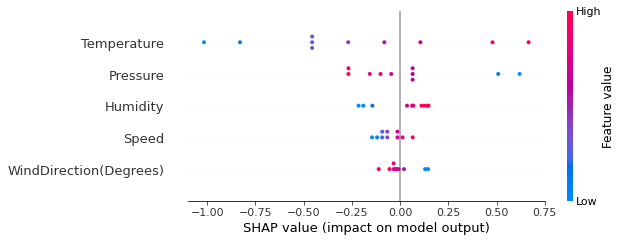

In [92]:
shap.summary_plot(shap_values_lm_test[0], X_test[:10])

**From above force plot we can see that in every instance the importance of the feature is different.**

1. First instance, the temperature has pushed the prediction significantly to lower side. Pressure has little effect on pushing the prediction to actual value.
2. Second instance, temperatre, humidity, pressure and speed has siginificant effect on lowering the prediction.
3. Third instance, Temperature is the most important feature according to model and has pushed the prediciton significantly towards actual value, while Humidity, speed and pressure are affecting predicition negatively.

In [62]:

lm_explnr = shap.KernelExplainer(lm.predict, shap.sample(X_train, 10))
shap_values_lm = lm_explnr.shap_values(X_test)
shap.force_plot(lm_explnr.expected_value[0], shap_values_lm[0], X_test)

100%|██████████| 6145/6145 [00:10<00:00, 571.03it/s]


**Above force plot allows us to analyze feature importance for the predictor more easily and we can select the feature from the dropdown**